In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# sklearn packages
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# plotting
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
upload = files.upload()

Saving german_credit_risk.csv to german_credit_risk.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(upload['german_credit_risk.csv']))

In [4]:
print(df.info())
df['Cost.Matrix'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Checking.Account   1000 non-null   object
 1   Duration           1000 non-null   int64 
 2   Credit.Hist        1000 non-null   object
 3   Purpose            1000 non-null   object
 4   Credit.Amount      1000 non-null   int64 
 5   Saving.Account     1000 non-null   object
 6   Employmnet         1000 non-null   object
 7   Disposable.Income  1000 non-null   int64 
 8   Personal.Status    1000 non-null   object
 9   Other.Debtors      1000 non-null   object
 10  Present.Residence  1000 non-null   int64 
 11  Property           1000 non-null   object
 12  Age                1000 non-null   int64 
 13  Other.Loans        1000 non-null   object
 14  Housing            1000 non-null   object
 15  Existing.Credits   1000 non-null   int64 
 16  Job                1000 non-null   object
 

1    700
2    300
Name: Cost.Matrix, dtype: int64

In [5]:
df['Cost.Matrix'].value_counts()

1    700
2    300
Name: Cost.Matrix, dtype: int64

In [6]:
# Check for missing values
df.isnull().sum()

Checking.Account     0
Duration             0
Credit.Hist          0
Purpose              0
Credit.Amount        0
Saving.Account       0
Employmnet           0
Disposable.Income    0
Personal.Status      0
Other.Debtors        0
Present.Residence    0
Property             0
Age                  0
Other.Loans          0
Housing              0
Existing.Credits     0
Job                  0
Number.Liable        0
Telephone            0
Foreign.Worker       0
Cost.Matrix          0
dtype: int64

In [7]:
df.head(5).T

,0,1,2,3,4
Checking.Account,A11,A12,A14,A11,A11
Duration,6,48,12,42,24
Credit.Hist,A34,A32,A34,A32,A33
Purpose,A43,A43,A46,A42,A40
Credit.Amount,1169,5951,2096,7882,4870
Saving.Account,A65,A61,A61,A61,A61
Employmnet,A75,A73,A74,A74,A73
Disposable.Income,4,2,2,2,3
Personal.Status,A93,A92,A93,A93,A93
Other.Debtors,A101,A101,A101,A103,A101


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Credit.Amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Disposable.Income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Present.Residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Existing.Credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
Number.Liable,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
Cost.Matrix,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0


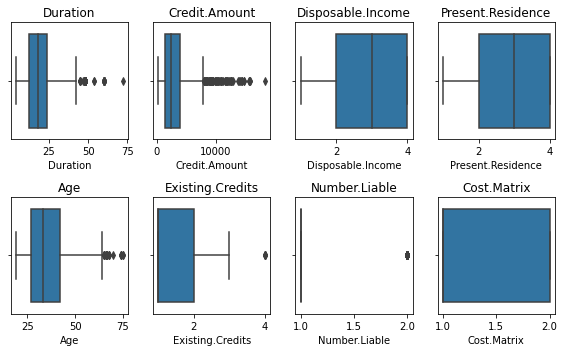

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns
fig, ax = plt.subplots(2, 4, figsize=(8, 5))
for i, col in enumerate(numeric_cols):
    ax[i//4, i%4].set_title(col)
    sns.boxplot(df[col], ax=ax[i//4, i%4]) # i//4, i%4 is the position of the subplot
plt.tight_layout(w_pad=1)
plt.show()

13


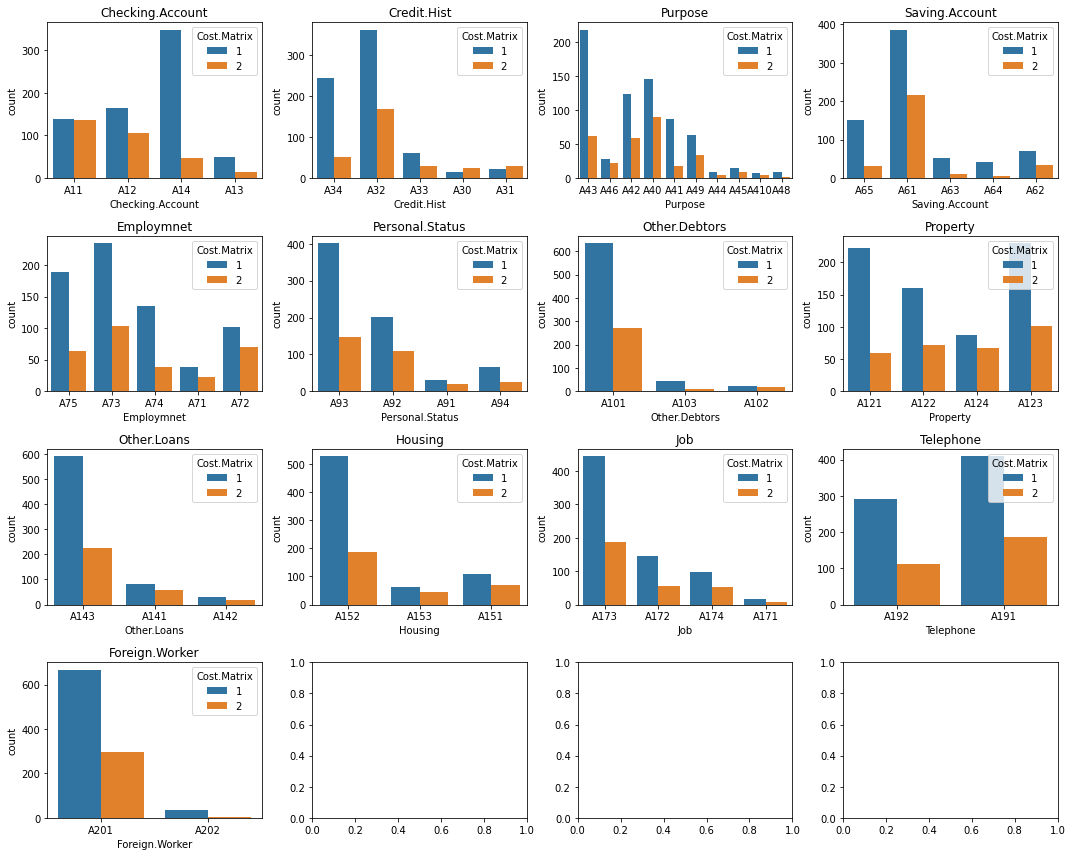

In [10]:
# Plot the frequency of categorical columns using barplot
categorical_cols = df.select_dtypes(include='object').columns
print(len(categorical_cols))
fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for i, col in enumerate(categorical_cols):
    ax[i//4, i%4].set_title(col)
    #df[col].value_counts().plot(kind='bar', ax=ax[i//4, i%4], hue=df['hue_col'])
    sns.countplot(x=col, data=df, ax=ax[i//4, i%4], hue='Cost.Matrix')
plt.tight_layout(w_pad=1)
plt.show()

In [11]:
prediction_col = 'Cost.Matrix'
feature_cols = df.columns.drop(prediction_col)
print(feature_cols)
print(len(feature_cols))

Index(['Checking.Account', 'Duration', 'Credit.Hist', 'Purpose',
       'Credit.Amount', 'Saving.Account', 'Employmnet', 'Disposable.Income',
       'Personal.Status', 'Other.Debtors', 'Present.Residence', 'Property',
       'Age', 'Other.Loans', 'Housing', 'Existing.Credits', 'Job',
       'Number.Liable', 'Telephone', 'Foreign.Worker'],
      dtype='object')
20


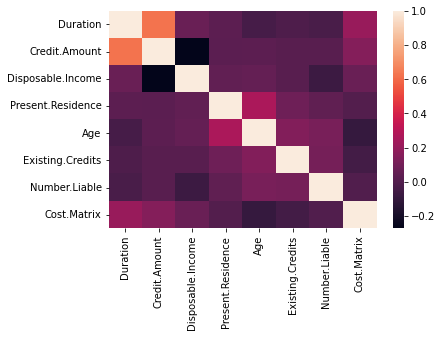

In [12]:
_ = sns.heatmap(df.corr())

In [13]:
correlation = df.corr()['Cost.Matrix'].abs().sort_values(ascending=False)
correlation

Cost.Matrix          1.000000
Duration             0.214927
Credit.Amount        0.154739
Age                  0.091127
Disposable.Income    0.072404
Existing.Credits     0.045732
Number.Liable        0.003015
Present.Residence    0.002967
Name: Cost.Matrix, dtype: float64

In [14]:
df.corr()

,Duration,Credit.Amount,Disposable.Income,Present.Residence,Age,Existing.Credits,Number.Liable,Cost.Matrix
Duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927
Credit.Amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739
Disposable.Income,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404
Present.Residence,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967
Age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127
Existing.Credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732
Number.Liable,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015
Cost.Matrix,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000


In [15]:
X = df[feature_cols].values
y = df[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=41)

In [16]:
# Use LabelEncoder to encode the categorical columns
le = LabelEncoder()
for i in range(len(feature_cols)):
    if df[feature_cols[i]].dtype == 'object':
        x_train[:, i] = le.fit_transform(x_train[:, i])
        x_test[:, i] = le.transform(x_test[:, i])

In [17]:
# Create a Decision Tree Classifier
dtree = DecisionTreeClassifier(criterion='entropy', class_weight={1:1, 2:.8}, max_depth=3, random_state=41)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={1: 1, 2: 0.8}, criterion='entropy',
                       max_depth=3, random_state=41)

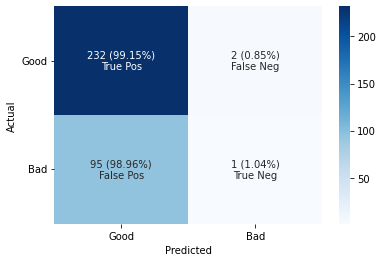

(array([1, 2]), array([234,  96]))
[[232   2]
 [ 95   1]]


In [18]:
# Plot a Heatmap of the Confusion Matrix
y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
group_names =[ 'True Pos','False Neg','False Pos','True Neg']
group_percentages = cm / cm.sum(axis=1)[:, np.newaxis]
# add groups names and percentages to the heatmap
labels = [f"{v1} ({v2:.2%})\n{v3}" for v1, v2, v3 in zip(cm.flatten(), group_percentages.flatten(), group_names)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.set_yticklabels(['Good','Bad'] ,rotation=0)
ax.set_xticklabels(['Good','Bad'])
plt.show()
print(np.unique(y_test, return_counts=True))
print(cm)

In [19]:
# Import classification_report
from sklearn.metrics import classification_report
# Print the accuracy score and classification report
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Classification Report: ')
print(classification_report(y_test, y_pred))

Accuracy Score:  0.706060606060606
Classification Report: 
              precision    recall  f1-score   support

           1       0.71      0.99      0.83       234
           2       0.33      0.01      0.02        96

    accuracy                           0.71       330
   macro avg       0.52      0.50      0.42       330
weighted avg       0.60      0.71      0.59       330



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


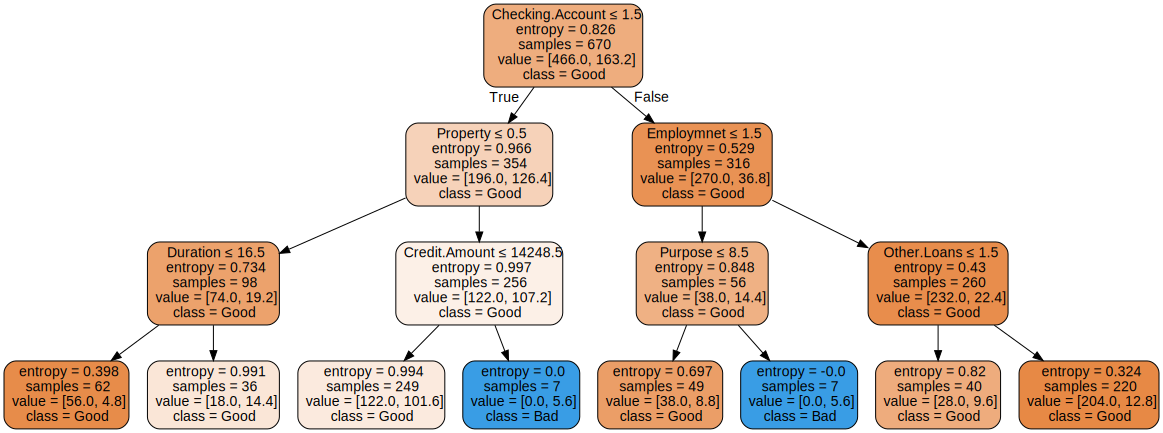

In [20]:
# add graphviz as a module
!pip install graphviz

# import the necessary packages
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a tree.dot file and visualize it
export_graphviz(dtree, out_file='tree.dot', feature_names=feature_cols, class_names=['Good', 'Bad'], filled=True, rounded=True, special_characters=True)
with open('tree.dot') as f:

    dot_graph = f.read()
graphviz.Source(dot_graph)

# Import the necessary packages


The Checking.Account variable is not determinant by itself. However:
- for those clients with Checking.Account more than 1.5 and Employment years less than 1.5 and Purpose less than 1.5 the 12.5% are estimated to be bad credits.
- for those clients with Checking.Account more than 1.5 and Property less than 0.5 and Credit.Amount greater than ~ 14,249 the 2.7% are estimated to be bad credits.

In [ ]:
# gridsearch for random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 300, 600], 
    'max_depth': [2, 4, 10, 12, 14, 20, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [{1:1, 2:.8}, {1:1, 2:.9}, {1:1, 2:.7}, {1:1, 2:.5}, {1:1, 2:.4}], 
    'random_state': [42],
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=2, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)
y_pred = grid.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 7560 candidates, totalling 37800 fits
{'bootstrap': True, 'class_weight': {1: 1, 2: 0.5}, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600, 'random_state': 42}
0.773134328358209
RandomForestClassifier(class_weight={1: 1, 2: 0.5}, criterion='entropy',
                       n_estimators=600, random_state=42)
[[210  24]
 [ 51  45]]
              precision    recall  f1-score   support

           1       0.80      0.90      0.85       234
           2       0.65      0.47      0.55        96

    accuracy                           0.77       330
   macro avg       0.73      0.68      0.70       330
weighted avg       0.76      0.77      0.76       330



In [ ]:
# GradientBoosting using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier()
param_grid = { 
    'n_estimators': [50, 100, 150], 
    'max_depth': [3, 4, 5],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['friedman_mse', 'squared_error'],
    'learning_rate': [0.1, 0.2, 0.5],
    'subsample': [0.4, 0.5, 0.6],
    'ccp_alpha': [0.0, 0.05, 0.1, 0.2],
    'validation_fraction': [0.0, 0.1, 0.5, 1.0],
    'random_state': [42]
}
grid = GridSearchCV(gboost, param_grid, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)
y_pred = grid.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42, 'subsample': 0.6, 'validation_fraction': 0.0}
0.7865671641791044
GradientBoostingClassifier(max_depth=4, max_features='sqrt', n_estimators=50,
                           random_state=42, subsample=0.6,
                           validation_fraction=0.0)
[[209  25]
 [ 49  47]]
              precision    recall  f1-score   support

           1       0.81      0.89      0.85       234
           2       0.65      0.49      0.56        96

    accuracy                           0.78       330
   macro avg       0.73      0.69      0.70       330
weighted avg       0.76      0.78      0.77       330



The DecisionTree model was fitted adjusting the class weight parameters and max depth. The class weight parameter made an important contribution to reduce the False Positives cases.

The RandomForest and GradientBoosting model gave similar accuracy and False Positive cases.

| Classifier | Decision Tree | Random Forest | Gradient Boosting |
|:-|:-|:- |:- |
| Accuracy score | 0.71 | 0.77 | 0.78 |
| False Pos | 95 | 51 | 49 |

In [ ]:
import joblib
import tempfile
from google.colab import drive
from sklearn.pipeline import Pipeline

with tempfile.TemporaryFile() as tf:
  drive.mount('/content/drive')
  steps = [('encoder', le), ('classifier', gboost)] 
  joblib.dump(Pipeline(steps), '/content/drive/My Drive/german-credit.pkl')
  tf.seek(0)